<center>
<img src="logo.png" height="900"> 
</center>


#  Обсчёт АБ-теста

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

Давайте представим, что у нас с вами есть сервис, который работает по подписке (онлайн игра, стриминговый сервис, например). Один из важных факторов успешности бизнеса в таком случае - это удержание пользователей, нам надо придумать, как заинтересовать пользователя в продлении подпсики. Возникла идея дать скидку в $1\%$ на продление подписки. Чтобы оценить эфект от этой идеи мы как-то разбили пользователей, которые купили подписку за период теста, на две группы и одним дали скидку на продление, а другим нет.

In [2]:
df1 = pd.read_csv('subscribers_1.csv', sep=',')
print(df1.shape)
df1.head( )

(25935, 10)


,user_id,service_id,product_name,product_duration,rn,sale_date,last_duration_days,new_duration_days,is_same,group
0,47233,929,subscription,1_month,1,2018-12-21,30.0,30,1,0
1,50195,929,subscription,1_month,1,2019-03-17,30.0,30,1,1
2,62594,929,subscription,1_month,1,2019-02-08,30.0,30,1,0
3,68918,929,subscription,1_month,2,2019-03-19,30.0,30,1,1
4,91900,929,subscription,3_month,1,2018-10-29,30.0,90,0,0


* `rn` - порядковый номер покупки подписки за период.  
* `last_duration_days` - длительность предыдущей подписки.
* `new_duration_days` - длительность текущей подписки.
* `is_same` - менялась ли длительность подписки.
* `group` - группа теста, в которую попал пользователь. 1 - тест, 0 - контроль.

__а)__ Обсчитайте результаты АБ-теста. Найдите разницу между старой и новой длительностями подписки. Постройте для этой разницы гистограмму. Подумайте и дайте себе ответ на следующие вопросы:

- Можно ли воспользоваться предпосылкой о нормальности распределения приростов и проверить гипотезу тестом Уэлча? 
- Переменная, для которой мы проводим тест имеет дискретное распределение. Можно ли здесь использовать тест Манна-Уитни? Даст ли это коректный результат? 
- Будет ли корректно использовать для проверки гипотезы ЦПТ и тест о равенстве средних, основанный на ней? 

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here
df1['differ'] = df1.new_duration_days - df1.last_duration_days

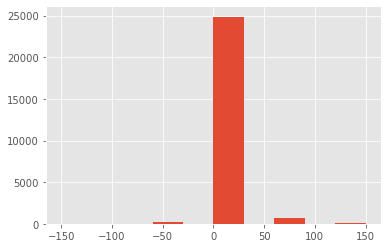

In [4]:
df1.differ.hist()
plt.show()

Правда ли, что средняя длительность подписки изменилась на $1\%$ уровне значимости? Для ответа на этот вопрос воспользуйтесь асимптотическим тестом на равенство средних против двусторонней альтернативы. Сохраните в переменную `z_obs` получившееся значение статистики, а в `pvalue` получившееся $p$-значение.

In [5]:
df1.head()

,user_id,service_id,product_name,product_duration,rn,sale_date,last_duration_days,new_duration_days,is_same,group,differ
0,47233,929,subscription,1_month,1,2018-12-21,30.0,30,1,0,0.0
1,50195,929,subscription,1_month,1,2019-03-17,30.0,30,1,1,0.0
2,62594,929,subscription,1_month,1,2019-02-08,30.0,30,1,0,0.0
3,68918,929,subscription,1_month,2,2019-03-19,30.0,30,1,1,0.0
4,91900,929,subscription,3_month,1,2018-10-29,30.0,90,0,0,60.0


In [6]:
test = df1.query('group == 1').differ
control = df1.query('group == 0').differ

In [7]:
test.mean()

1.994826536822885

In [8]:
control.mean()

2.139003987178485

In [9]:
from scipy import stats as sts


In [10]:
mean_tr = test.mean()
std_tr = test.std(ddof=1)
len_tr = len(test)

mean_fs =control.mean()
std_fs = control.std(ddof=1)
len_fs = len(control)

alpha = 0.05
norm_rv = sts.norm()
z_stat_alpha = norm_rv.ppf(1 - alpha/2)


z_obs = (mean_tr - mean_fs)/np.sqrt(std_fs**2/len_fs + std_tr**2/len_tr)

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

z_obs = (mean_tr - mean_fs)/np.sqrt(std_fs**2/len_fs + std_tr**2/len_tr)
pvalue = 2*(1 - norm_rv.cdf(np.abs(z_obs)))

# your code here


In [12]:
# проверка того, что задание решено верно
assert np.abs(z_obs) < 1
assert np.abs(z_obs) > 0.7

# подобные тесты скрыты от вас 


__б)__ А теперь представим, что мы продвинутые АБ-тестеры и решили провести ААБ тест (2 контрольные группы и одну тестовую).

In [13]:
df2 = pd.read_csv('subscribers_2.csv', sep=',')
print(df2.shape)
df2.head( )

(25935, 10)


,user_id,service_id,product_name,product_duration,rn,sale_date,last_duration_days,new_duration_days,is_same,new_group
0,47233,929,subscription,1_month,1,2018-12-21,30.0,30,1,0
1,50195,929,subscription,1_month,1,2019-03-17,30.0,30,1,2
2,62594,929,subscription,1_month,1,2019-02-08,30.0,30,1,0
3,68918,929,subscription,1_month,2,2019-03-19,30.0,30,1,2
4,91900,929,subscription,3_month,1,2018-10-29,30.0,90,0,0


* `new_group` - группа теста, в которую попал пользователь. $2$ - тест, $0,1$ - контроль.

Проверьте гипотезу о том, что в каждой из контрольных групп среднее совпадает с тестовой на уровне значимости $1\%$. Получившиеся $p$-значения запишите в переменные `pval_1` и `pval_2`. Сделайте корректировку методом Холма. Запишите количество отвергнутых гипотез в переменную `hyp_cnt`. 

In [14]:
df2['differ'] = df2.new_duration_days - df2.last_duration_days

In [15]:
df2.new_group.value_counts()

2    8831
1    8595
0    8509
Name: new_group, dtype: int64

In [17]:
test = df2.query('new_group == 2').differ
control_1 = df2.query('new_group == 0').differ
control_2 = df2.query('new_group == 1').differ

In [18]:
mean_tr = test.mean()
std_tr = test.std(ddof=1)
len_tr = len(test)

mean_fs_1 =control_1.mean()
std_fs_1 = control_1.std(ddof=1)
len_fs_1 = len(control_1)

mean_fs_2 =control_2.mean()
std_fs_2 = control_2.std(ddof=1)
len_fs_2 = len(control_2)


alpha = 0.05
norm_rv = sts.norm()

z_obs_1 = (mean_tr - mean_fs_1)/np.sqrt(std_fs_1**2/len_fs_1 + std_tr**2/len_tr)
z_obs_2 = (mean_tr - mean_fs_2)/np.sqrt(std_fs_2**2/len_fs_2 + std_tr**2/len_tr)

In [19]:
from statsmodels.sandbox.stats.multicomp import multipletests 


In [20]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

pval_1 = 2*(1 - norm_rv.cdf(np.abs(z_obs_1)))
pval_2 = 2*(1 - norm_rv.cdf(np.abs(z_obs_2)))

rejected, p_corrected, _, _ = multipletests([pval_1, pval_2], 
                                            alpha = 0.05, 
                                            method = 'holm') 

hyp_cnt = np.sum([p_corrected < 0.01])

# your code here


In [21]:
# проверка того, что задание решено верно
assert pval_1 < 0.5
assert pval_1 > 0.4
assert pval_2 > 0.3
assert pval_2 < 0.4

# подобные тесты скрыты от вас 

Какие выводы можно сделать из этого теста?  Валиден ли такой тест?  Если нет, то в чем может быть проблема? Если тут вообще смысл делать поправку Холма?